In [1]:
import numpy as np   # Código em python para as wavelets de Interpolets de gênero 4


In [2]:
a=(0.683012701892219,1.183012701892219,0.316987298107781,-0.183012701892219) # Coeficientes de Daubechies de gênero 4

In [3]:
A = np.array( ((1, 1), (1, 9)) )  # Código para o cálculo dos coeficientes de filtro das interpolets de Deslauriers-Dubuc
print("Matriz A \n",A)
b = np.array((0.5, 0))
print("Vetor b \n",b)
c  = np.linalg.solve(A, b)
print("Solução de Ax=b é c = ",c)


Matriz A 
 [[1 1]
 [1 9]]
Vetor b 
 [0.5 0. ]
Solução de Ax=b é c =  [ 0.5625 -0.0625]


In [4]:
coeficientes =(c[1],0.0,c[0],1.0,c[0],0.0,c[1])
print(coeficientes)
for i in range(-3,3,-1):
    print(coeficientes[i])

(-0.0625, 0.0, 0.5625, 1.0, 0.5625, 0.0, -0.0625)


In [5]:
def wavelet_escala(x):
    wavelet_val=0
    if (x==3 or x==0):
        return 0
    elif (x==1):
        return 1.366025403782968
    elif (x==2):
        return -0.366025403782968
    elif (x<0 or x>3):
        return 0
    elif (x>0 and x<3):
        for m in range(0,4,1):
             wavelet_val += a[m]*wavelet_escala(2*x-m)
        return wavelet_val
print(wavelet_escala(0.5))

0.9330127018912143


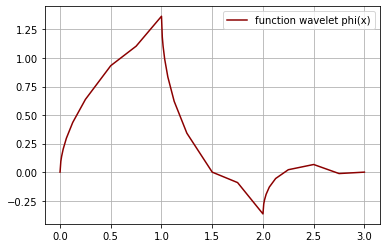

In [6]:
import matplotlib.pyplot as plt
x=[0.0,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,0.75,1.0,1.0078125,1.015625,1.03125,1.0625,1.125,1.25,1.5,1.75,2.0,2.0078125,2.015625,2.03125,2.0625,2.125,2.25,2.5,2.75,3.0]    # Comprehenssion list for values of x and y
y=[wavelet_escala(i) for i in x]
#print(y)

plt.plot(x,y,color='#8B0000', label='function wavelet phi(x)')   #Ploting of graph of wavelet function phi
plt.grid()
plt.legend()
plt.show()

In [7]:
def interpolet_escala(x):
    interpolet_val=0
    if (x==-3 or x==3 or x==2 or x==-2 or x==1 or x==-1):
        return 0
    elif (x<-3 or x>3):
        return 0
    elif (x==0):
        return 1
    elif ((x>-3 and x<-2) or (x>-2 and x<-1) or (x>-1 and x<0) or (x>0 and x<1) or (x>1 and x<2) or (x>2 and x<3)): 
        for m in range(0,7,1):
             interpolet_val += coeficientes[m]*interpolet_escala(2*x-m+3)
        return interpolet_val

In [10]:
print(interpolet_escala(-0.750))

0.2578125


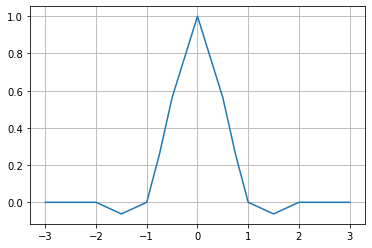

In [11]:
import matplotlib.pyplot as plt
x2=[-3.0,-2.5,-2.0,-1.5,-1.0,-0.75,-0.5,0.0,0.5,0.75,1.0,1.5,2.0,2.5,3.0]    # Comprehenssion list for values of x and y
y2=[interpolet_escala(i) for i in x2]
#print(y)

plt.plot(x2,y2)   #Ploting of graph of wavelet interpolet
plt.grid()
plt.show()

In [12]:
from sympy import *  # Cálculo de integrais em Python 
init_printing()
var('x,y')

In [13]:
f = Lambda(x, (x**3 - 3*x + 2)*exp(-x/4) - 1)

In [14]:
f

In [15]:
integrate(f(x), x)

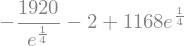

In [16]:
integrate(f(x), (x, -1, 1))

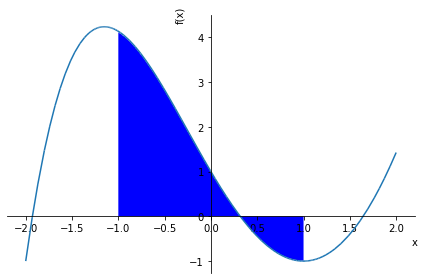

In [20]:
%matplotlib inline                          
p = plot(f(x), (x, -2, 2), show=False)
q = plot_implicit(y<f(x), (x, -1, 1), (y, 0, 6), show=False)
p.extend(q)
q = plot_implicit(y>f(x), (x,-1,1), (y,-2,0), show=False)
p.extend(q)
p.show()

In [21]:
xstar = nsolve(f(x), x, 0.25) #encontra o zero x* de f
A = integrate(f(x), (x, -1, xstar)) - integrate(f(x), (x, xstar, 1))
N(A)